In [2]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
import sys
sys.path.append("C:/Users/w510663/Desktop/Pyri/connections/")
from conn import snowflake_conn

# Get execution time
st = time.time()

conn = snowflake_conn()
cur = conn.cursor()

# Original dataset can be found in the following table
## SANDBOX.BCG_ENG__W510663.RDS_NAF_PM_EXCL_ACCOUNTS
## SANDBOX.BCG_ENG__W510663.RDS_NAF_PM_EXCL_ACCOUNTS_RETRAIN_SCORING

cur.execute('''
    SELECT SCR.*, EXCL.CR_LIMIT
    FROM "DATAIKU_ANALYTICS_SUB"."RISK_FRAUD"."RDS_NAF_PM_EXCL_ACCOUNTS_RETRAIN_SCORING" SCR
    LEFT JOIN "DATAIKU_ANALYTICS_SUB"."RISK_FRAUD"."RDS_NAF_PM_EXCL_ACCOUNTS" EXCL
     ON SCR.CUST_ID = EXCL.CUST_ID AND SCR.SETID = EXCL.SETID AND SCR.REF_DATE = EXCL.REF_DATE
    WHERE YEAR(SCR.REF_DATE) IN (2021,2022)
    AND SCR.REF_DATE::DATE NOT IN ('2021-04-01', '2021-08-01')
;
''')
retrain_df = pd.DataFrame.from_records(iter(cur), columns=[x[0] for x in cur.description])

et = time.time()
elapsed_time = et - st
print('Data Shape:', retrain_df.shape, 
      '\nExecution time:', elapsed_time / 60, 'minutes')

retrain_df.head()

Failed to import ArrowResult. No Apache Arrow result set format can be used. ImportError: DLL load failed while importing arrow_iterator: The specified procedure could not be found.


Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://myapps.wexinc.com/app/snowflake/exkaea789nRrm6HV7357/sso/saml?SAMLRequest=pZNdc%2BIgFIb%2FSoa9DpBoqzLGjq3r1J1qXT%2Fa2d5hgspIIOUQo%2F%2B%2BxI%2Bd7kV7s3eEvIfnPeeF7t0hV8FeWJBGJyjCFAVCpyaTepOg5WIYtlEAjuuMK6NFgo4C0F2vCzxXBeuXbqtn4r0U4AJ%2FkAZW%2F0hQaTUzHCQwzXMBzKVs3h8%2FsRhTxgGEdR6HLiUZSM%2FaOlcwQqqqwlUDG7shMaWU0A7xqlryA31CFN8zCmucSY26lhx8T18gIkKbNcIrPGF6KbyX%2BjyC7yirswjY42IxDafP8wUK%2BtfuHoyGMhd2LuxepmI5ezobAO9g9c5pq92kuISw8rMLY1xYuedOKKl3GLSp1orvRGryonQegf2KrEVGlNlIP7jRIEHFTmZZ9Pq0jW3Ex9B4vreT33QmiqH56X4t1figN%2B231XayctHrn12KgpdrzHEd8wigFCNdh%2Bv8Fo2bIY3DOFrElN3cMtrBcYO%2BoWDgDUrN3any2kF%2B5EUBuBIHqdOTO%2F9N%2Fhon4rDjgrfaHT2z%2Be3jS6tx0yIAhtThofP9YScHtvdfU%2BmSz0dd7uXERzUaTI2S6TEYGptz93WSEY5OOzIL1ycpEzmXqp9lVgD4RJUy1YMV3keCnC0FIr0z9d8

,CUST_ID,SETID,REF_DATE,A_NAICS_2_DIGIT_C,A_TENURE_MONTHS_N,A_FLAG_REVOLVER_B,A_YEARS_IN_BUSINESS_APP_N,A_FLEET_SIZE_APP_N,D_SPREAD_EXPOSURE_6M_N,D_MAX_DAYS_PAST_DUE_6M_N,...,FLAG_90_DPD_366_DAYS,A_BUSINESS_PROGRAM_C,A_MARKETING_CHANNEL_C,FLAG_CHARGEOFF_366_DAYS,A_PORTFOLIO_C,EXCL_FLAG_GROUP,proba_0,proba_1,prediction,CR_LIMIT
0,9100009325557,REV,2022-12-01 00:00:00-08:00,54,17,1,8.0,2.0,1.006844,6.0,...,0,None,Online Form,0,REV,Inclusion,0.905082,0.094918,0,8000.00
1,9100005413347,REV,2022-12-01 00:00:00-08:00,23,50,1,NaN,NaN,0.599842,5.0,...,0,None,None,0,REV,Inclusion,0.993552,0.006448,0,6000.00
2,9100001240056,FSC,2022-12-01 00:00:00-08:00,56,142,0,NaN,NaN,2.201017,55.0,...,0,None,None,0,FSC,Inclusion,0.801020,0.198980,0,500.00
3,9100008232885,FSC,2022-12-01 00:00:00-08:00,48,32,0,3.0,6.0,0.249752,0.0,...,0,None,Generic,0,FSC,Inclusion,0.982966,0.017034,0,18600.00
4,9100010812609,WXC,2022-12-01 00:00:00-08:00,52,6,0,NaN,NaN,2.083553,0.0,...,0,None,None,0,WXC,Inclusion,0.992356,0.007644,0,4468.90


In [4]:
# Drop model unused from the dataset
cols_to_drop = ['SETID', 'A_BUSINESS_PROGRAM_C', 'A_MARKETING_CHANNEL_C', 'A_PORTFOLIO_C',
                'FLAG_90_DPD_366_DAYS', 'FLAG_CHARGEOFF_366_DAYS', 'proba_0',
                # 'EXCL_PORTFOLIO_FLAG', 'EXCL_CUST_STATUS_FLAG', 'EXCL_CUST_TENURE_FLAG',
                # 'EXCL_DUMMY_CREDIT_LIMIT_FLAG', 'EXCL_MATERIAL_DELINQUENCY_FLAG',
                # 'EXCL_CUST_CONVERSION_FLAG', 'EXCL_FRAUD_FLAG', 'WX_CR_RATING_DATE_TO_REF_DATE', 'EARLIEST_ACTIVE_DATE_TO_REF_DATE',
                # 'ALL_EXCL_FLAGS_SUM', 'RETRAIN_EXCL_FLAGS_SUM',
                # 'EXCL_GOV_VIP_FLAG', 'EXCL_LARGE_CREDIT_LIMIT_FLAG', 'EXCL_EFPS_FLAG', 'WX_CUST_SUSP_CLASS', 'GOVERNMENT_FLG',
                # 'BUSINESS_MONTH', 'BUSINESS_DATE', 'BUSINESS_DATE_TO_LINK', 'WX_AGE99', 'WX_EIPP_BALANCE',
]

cols_rename_map = {'CUST_ID': 'ID',
                   'FLAG_60_DPD_366_DAYS': 'target',
                   'proba_1': 'y_pred_proba',
                   'prediction': 'y_pred',
}

retrain = retrain_df.drop(cols_to_drop, axis=1)
retrain.rename(cols_rename_map, axis=1, inplace=True)
retrain['REF_DATE'] = pd.to_datetime(retrain['REF_DATE'], utc=True)

incl = retrain[(retrain['EXCL_FLAG_GROUP'] == 'Inclusion') & (retrain['CR_LIMIT'] < 150000)]
gov = retrain[retrain['EXCL_FLAG_GROUP'] == 'GOV']
vip = retrain[retrain['EXCL_FLAG_GROUP'] == 'VIP']
efps = retrain[retrain['EXCL_FLAG_GROUP'] == 'EFPS']
at_150k = retrain[(retrain['EXCL_FLAG_GROUP'] == 'Inclusion') & (retrain['CR_LIMIT'] == 150000)]
at_150k['EXCL_FLAG_GROUP'] = '150k Credit Limit'
over_150k = retrain[(retrain['EXCL_FLAG_GROUP'] == 'Large Credit Limit') & (retrain['CR_LIMIT'] > 150000)] 

# print out the shape of each dataframe
print('Inclusion:', incl.shape)
print('Government:', gov.shape)
print('VIP:', vip.shape)
print('EPFS:', efps.shape)
print('$150k Credit Limit:', at_150k.shape)
print('Over $150k Credit Limit:', over_150k.shape)

Inclusion: (5108662, 30)
Government: (230315, 30)
VIP: (46859, 30)
EPFS: (254926, 30)
$150k Credit Limit: (14515, 30)
Over $150k Credit Limit: (30805, 30)


In [5]:
feature_list = ['A_NAICS_2_DIGIT_C', 'A_TENURE_MONTHS_N', 'A_FLAG_REVOLVER_B', 'A_YEARS_IN_BUSINESS_APP_N',
       'A_FLEET_SIZE_APP_N', 'D_SPREAD_EXPOSURE_6M_N',
       'D_MAX_DAYS_PAST_DUE_6M_N', 'D_MAX_EXPOSURE_1M_N', 'D_DAYS_SINCE_LAST_SUSPENSION_CURRENT_N', 'D_DAYS_SINCE_LAST_30DPD_CURRENT_N',
       'D_DAYS_PAST_DUE_CURRENT_N', 'D_SPREAD_FRAC_UNBILLED_6M_N', 'D_MAX_FRAC_UNBILLED_1M_N', 'D_MAX_DAYS_PAST_DUE_1M_N',
       'DNB_COMMERCIAL_CREDIT_SCORE_CURRENT_N', 'DNB_FINANCIAL_STRESS_SCORE_CURRENT_N', 'LN_LEXISNEXIS_SCORE_CURRENT_N', 'LN_LEXISNEXIS_SBFE_SCORE_CURRENT_N',
       'T_TOTAL_TRX_NON_FUEL_PROPORTION_1M_N', 'T_SPREAD_GROSS_SPEND_6M_N', 'T_SPREAD_TOTAL_TRX_6M_N', 'T_SUM_GALLONS_1M_N', 'T_SPREAD_SUM_GALLONS_6M_N',
]

In [6]:
missing_values = incl.copy()
missing_values = missing_values[feature_list]
missing_values = pd.DataFrame(missing_values.isna().sum())
missing_values.rename(columns={missing_values.columns[0]: 'count'}, inplace = True)

# missing_values_na = missing_values_na[missing_values_na['count'] != 0]
missing_values['Inclusion'] = missing_values['count']/incl.shape[0]
# change pct_missing to x.xx% format
missing_values['Inclusion'] = missing_values['Inclusion'].apply(lambda x: '{:.2%}'.format(x))

missing_values = missing_values.drop(columns=['count'])


for df_list in [gov, vip, efps, at_150k, over_150k]:
    df_na = df_list.copy()
    df_na = df_na[feature_list]
    df_na = pd.DataFrame(df_na.isna().sum())
    df_na.rename(columns={df_na.columns[0]: 'count'}, inplace = True)
    
    df_name = df_list['EXCL_FLAG_GROUP'].iloc[0]
    # df_na_na = df_na_na[df_na_na['count'] != 0]
    df_na[f'{df_name}'] = df_na['count']/df_list.shape[0]
    # change pct_missing to x.xx% format
    df_na[f'{df_name}'] = df_na[f'{df_name}'].apply(lambda x: '{:.2%}'.format(x))

    # drop count column
    df_na = df_na.drop(columns=['count'])

    missing_values = missing_values.join(df_na)

missing_values

,Inclusion,GOV,VIP,EFPS,150k Credit Limit,Large Credit Limit
A_NAICS_2_DIGIT_C,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
A_TENURE_MONTHS_N,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
A_FLAG_REVOLVER_B,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
A_YEARS_IN_BUSINESS_APP_N,61.77%,95.04%,83.53%,77.22%,72.85%,91.13%
A_FLEET_SIZE_APP_N,54.62%,55.36%,71.08%,56.64%,46.75%,78.84%
D_SPREAD_EXPOSURE_6M_N,0.13%,0.04%,0.09%,2.44%,0.02%,0.04%
D_MAX_DAYS_PAST_DUE_6M_N,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
D_MAX_EXPOSURE_1M_N,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
D_DAYS_SINCE_LAST_SUSPENSION_CURRENT_N,68.04%,82.05%,76.50%,87.92%,80.08%,92.08%
D_DAYS_SINCE_LAST_30DPD_CURRENT_N,91.94%,80.58%,88.68%,98.38%,98.67%,95.94%


In [39]:
df_list = [incl, gov, vip, efps, at_150k, over_150k]
df_name = ['Inclusion', 'Government', 'VIP', 'EFPS', '150k Credit Limit', 'Over 150k Credit Limit']

def feature_hist_plot(feature_name):
    fig,axs = plt.subplots(1, 6, figsize = (20, 4))

    h, v = 0, 0

    for l, n in zip(df_list, df_name):
        g = sns.histplot(data=l, x=feature_name,
                        #  log_scale=True,
                         hue='target', multiple='layer', ax=axs[v])
        # g.set_yscale('log')
        g.set(title=n)
        # # rotate x-axis labels
        # for tick in g.get_xticklabels():
        #     tick.set_rotation(90)
        v += 1

    fig.tight_layout()

In [8]:
feature_list = ['A_NAICS_2_DIGIT_C', 'A_TENURE_MONTHS_N', 'A_FLAG_REVOLVER_B', 'A_YEARS_IN_BUSINESS_APP_N',
       'A_FLEET_SIZE_APP_N', 'D_SPREAD_EXPOSURE_6M_N',
       'D_MAX_DAYS_PAST_DUE_6M_N', 'D_MAX_EXPOSURE_1M_N', 'D_DAYS_SINCE_LAST_SUSPENSION_CURRENT_N', 'D_DAYS_SINCE_LAST_30DPD_CURRENT_N',
       'D_DAYS_PAST_DUE_CURRENT_N', 'D_SPREAD_FRAC_UNBILLED_6M_N', 'D_MAX_FRAC_UNBILLED_1M_N', 'D_MAX_DAYS_PAST_DUE_1M_N',
       'DNB_COMMERCIAL_CREDIT_SCORE_CURRENT_N', 'DNB_FINANCIAL_STRESS_SCORE_CURRENT_N',
       'LN_LEXISNEXIS_SCORE_CURRENT_N', 'LN_LEXISNEXIS_SBFE_SCORE_CURRENT_N',
       'T_TOTAL_TRX_NON_FUEL_PROPORTION_1M_N', 'T_SPREAD_GROSS_SPEND_6M_N', 'T_SPREAD_TOTAL_TRX_6M_N', 'T_SUM_GALLONS_1M_N', 'T_SPREAD_SUM_GALLONS_6M_N',
]

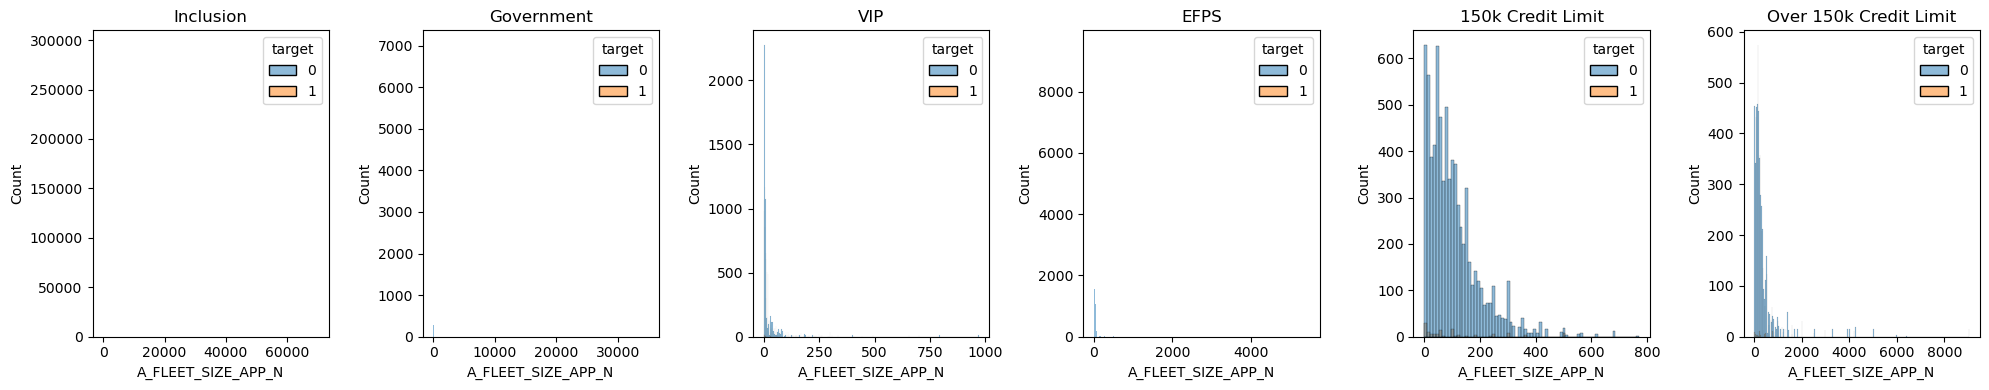

In [40]:
feature_hist_plot('A_FLEET_SIZE_APP_N')

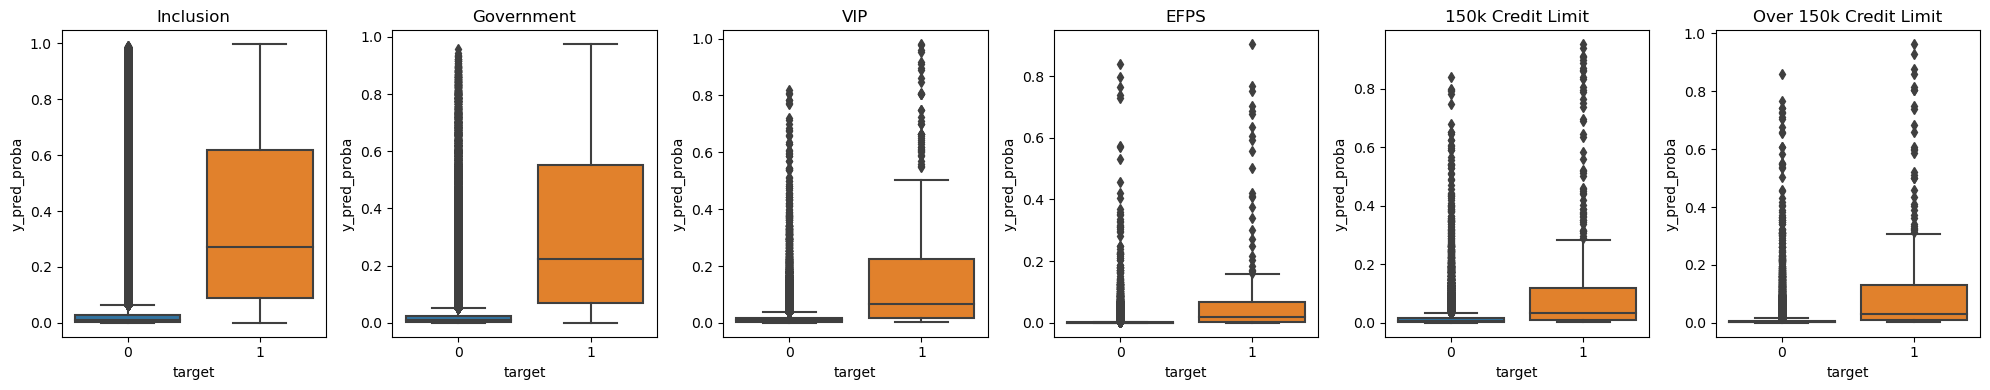

In [22]:
fig,axs = plt.subplots(1, 6, figsize = (20, 4))

h, v = 0, 0

for l, n in zip(df_list, df_name):
    g = sns.boxplot(data=l, x='target', y='y_pred_proba', ax=axs[v])
    # g.set_yscale('log')
    g.set(title=n)
    v += 1

fig.tight_layout()